In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [3]:
data_path = "./data/train.csv"

In [4]:
data_raw = pd.read_csv(data_path)
data_raw.shape

(159571, 8)

In [7]:
print("# of rows in data = {}".format(data_raw.shape[0]))
print("# of columns in data = {}".format(data_raw.shape[1]))
print("\n")
printmd("**Sample data:**")
data_raw.head()

# of rows in data = 159571
# of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## 1.1 检查缺失值

In [9]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


## 1.2 计算每个标签数目

In [10]:
# 没有标签的样本为干净的
# axis=1: 行     axis=0: 列

rowSums = data_raw.iloc[:, 2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = {}".format(len(data_raw)))
print("Number of clean comments = {}".format(clean_comments_count))
print("Number of comments with labels = {}".format(len(data_raw)-clean_comments_count))


Total number of comments = 159571
Number of clean comments = 143346
Number of comments with labels = 16225


In [11]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [13]:
# 计算每个标签样本数

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))

data_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
data_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


#### 画图统计各个标签信息

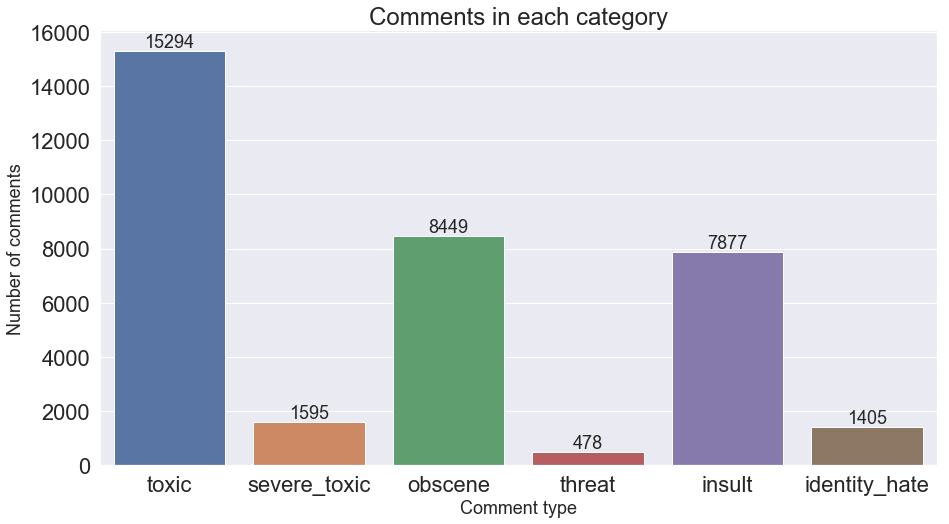

In [17]:
sns.set(font_scale=2)
plt.figure(figsize=(15,8))

ax = sns.barplot(categories, data_raw.iloc[:, 2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel("Number of comments", fontsize=18)
plt.xlabel("Comment type", fontsize=18)

# 添加文本标签
rects = ax.patches
labels = data_raw.iloc[:, 2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom", fontsize=18)

## 1.3 统计多标签样本量

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64 <class 'pandas.core.series.Series'>


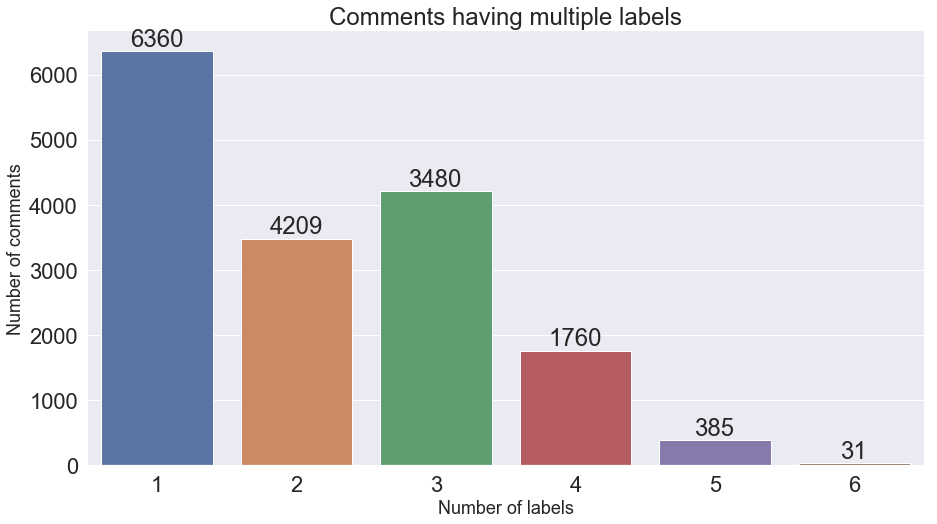

In [20]:
rowSums = data_raw.iloc[:, 2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
print(multiLabel_counts, type(multiLabel_counts))

multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale=2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels")
plt.ylabel("Number of comments", fontsize=18)
plt.xlabel("Number of labels", fontsize=18)

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, height+5, label, ha="center", va="bottom")

## 1.4 WordCloud显示每个标签常用词

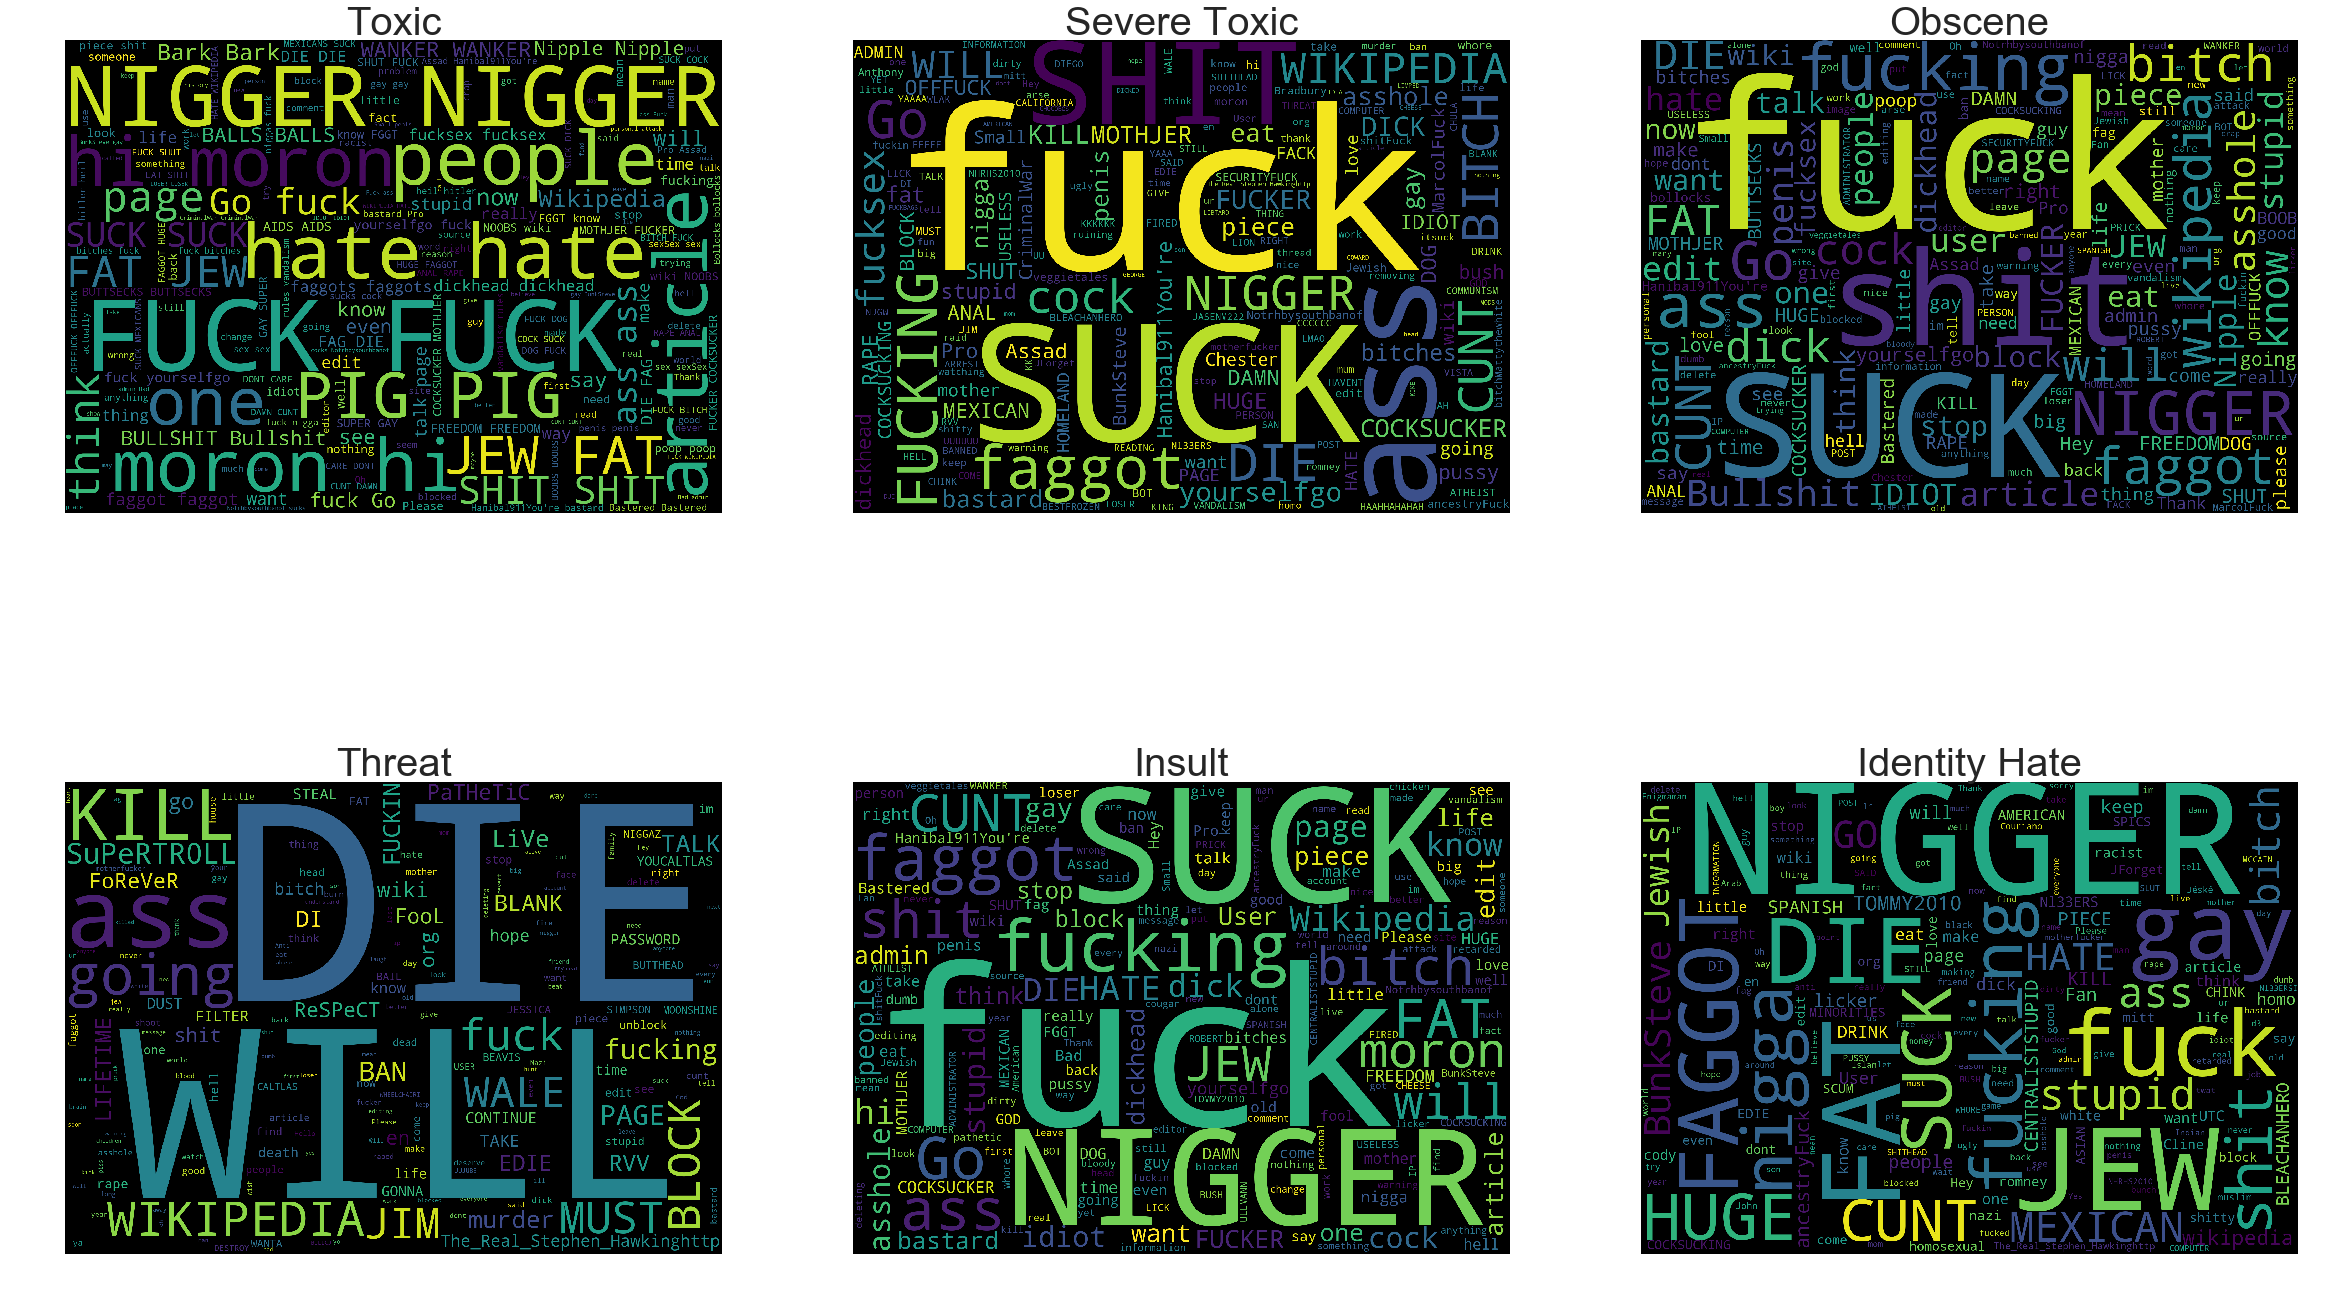

In [21]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(40, 25))

# label: toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
colud_toxic = WordCloud(stopwords=STOPWORDS,
                       background_color='black',
                       width=2500,
                       height=1800).generate(" ".join(text))
plt.subplot(2,3,1)
plt.axis("off")
plt.title("Toxic", fontsize=40)
plt.imshow(colud_toxic)

# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()


## 2. 数据预处理

In [23]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## 2.1 清洗数据

In [30]:
def cleanHtml(sentence):
    """删除html标签"""
    cleaner = re.compile("<.*?>")
    cleantext = re.sub(cleaner, " ", str(sentence))
    return cleantext

def cleanPunc(sentence):
    """删除标签符号"""
    cleaned = re.sub(r'[?|!|\'|"|#]', r"", sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r" ", cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n", " ")
    return cleaned

def keepAlpha(sentence):
    """删除字母和空格以外的所有词"""
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub("[^a-z A-Z]+", " ", word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [31]:
data["comment_text"] = data["comment_text"].str.lower()
data["comment_text"] = data["comment_text"].apply(cleanHtml)
data["comment_text"] = data["comment_text"].apply(cleanPunc)
data["comment_text"] = data["comment_text"].apply(keepAlpha)
data.head

<bound method NDFrame.head of                       id                                       comment_text  \
1146    031a838b55294b45  the nextgen recon commandos are picked for a s...   
153684  a0dac906c5f05083  vandalism at pinto da costa well done kid you ...   
156257  cb853df0d4e3ede1  file sln sanlorenzomartire jpg missing descrip...   
61200   a3d17ab815f7991c  my user page hi i havent been around much late...   
146806  31d8dcc5c8af8331  i assume you are talking about the hatnote iss...   
...                  ...                                                ...   
88342   ec557bbe723be0ee  charles xii is the only older swedish king who...   
67964   b5d2cf936abd6013  adding to section on tm related research ive a...   
34476   5c10afda71e93f6c  you have been blocked for threee hours farmbrough   
734     01fbfc6d2307bc17  august   utc hey looks like your rehab program...   
27021   478a4a4a198feb0b  i have read various pieces by dr mehdi khazali...   

        toxic  severe

## 2.2 删除停用词

In [34]:
stop_words = set(stopwords.words("english"))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also',
                   'across','among','beside','however','yet','within'])

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)


def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data["comment_text"] = data["comment_text"].apply(removeStopWords)
data.head

<bound method NDFrame.head of                       id                                       comment_text  \
1146    031a838b55294b45   nextgen recon commandos  picked   smaller squ...   
153684  a0dac906c5f05083  vandalism  pinto da costa well done kid  got  ...   
156257  cb853df0d4e3ede1  file sln sanlorenzomartire jpg missing descrip...   
61200   a3d17ab815f7991c   user page hi  havent  around much lately  put...   
146806  31d8dcc5c8af8331   assume   talking   hatnote issue   describe  ...   
...                  ...                                                ...   
88342   ec557bbe723be0ee  charles xii    older swedish king whose death ...   
67964   b5d2cf936abd6013  adding  section  tm related research ive added...   
34476   5c10afda71e93f6c                   blocked  threee hours farmbrough   
734     01fbfc6d2307bc17  august   utc hey looks like  rehab program did...   
27021   478a4a4a198feb0b    read various pieces  dr mehdi khazali  liste...   

        toxic  severe

## 2.3 词干

In [35]:
stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data["comment_text"] = data["comment_text"].apply(stemming)
data.head

<bound method NDFrame.head of                       id                                       comment_text  \
1146    031a838b55294b45  nextgen recon commando pick smaller squad stea...   
153684  a0dac906c5f05083  vandal pinto da costa well done kid got want s...   
156257  cb853df0d4e3ede1  file sln sanlorenzomartir jpg miss descript de...   
61200   a3d17ab815f7991c  user page hi havent around much late put expla...   
146806  31d8dcc5c8af8331  assum talk hatnot issu describ handl wp articl...   
...                  ...                                                ...   
88342   ec557bbe723be0ee  charl xii older swedish king whose death date ...   
67964   b5d2cf936abd6013  ad section tm relat research ive ad inform beg...   
34476   5c10afda71e93f6c                       block threee hour farmbrough   
734     01fbfc6d2307bc17  august utc hey look like rehab program didnt t...   
27021   478a4a4a198feb0b  read various piec dr mehdi khazali listen vari...   

        toxic  severe

## 2.4 Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [37]:
train_text = train["comment_text"]
test_text = test["comment_text"]

## 2.5 TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents="unicode", analyzer="word", 
                            ngram_range=(1,3), norm="l2")
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels=["id", "comment_text"], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels=["id", "comment_text"], axis=1)

## 3. Multi-Label Classification

## 3.1 Multi Binary Classification-(One-VS-Rest Classifier)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [42]:
%%time

LogReg_pipeline = Pipeline([("clf", OneVsRestClassifier(LogisticRegression(solver="sag"), n_jobs=-1)),])

for category in categories:
    printmd("**Processing {} comments ...**".format(category))
    
    LogReg_pipeline.fit(x_train, train[category])
    
    prediction = LogReg_pipeline.predict(x_test)
    print("Test accuracy is {}".format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments ...**

Test accuracy is 0.9016666666666666




**Processing severe_toxic comments ...**

Test accuracy is 0.9883333333333333




**Processing obscene comments ...**

Test accuracy is 0.9416666666666667




**Processing threat comments ...**

Test accuracy is 0.9983333333333333




**Processing insult comments ...**

Test accuracy is 0.9483333333333334




**Processing identity_hate comments ...**

Test accuracy is 0.9833333333333333


Wall time: 330 ms


## 3.2 Multi Binary Classifications-(Binary Relevance)

![](pic/binary_relevance.png)

In [45]:
%%time

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))

Accuracy = 0.8566666666666667
Wall time: 12.8 s


## 3.3 Classifier Chains

![](pic/classifier_chains.png)

In [46]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [47]:
%%time

classifier = ClassifierChain(LogisticRegression())

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))

Accuracy = 0.89
Wall time: 12.2 s


## 3.4 Label Powerset

In [48]:
from skmultilearn.problem_transform import LabelPowerset

![](pic/label_powerset.png)

In [49]:
%%time

classifier = LabelPowerset(LogisticRegression())

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions)))

Accuracy = 0.89
Wall time: 713 ms


## 3.5 Adapted Algorithm

In [50]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [51]:
%%time

classifier_new = MLkNN(k=10)

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

classifier_new.fit(x_train, y_train)

predictions_new = classifier_new.predic(x_test)

print("Accuracy = {}".format(accuracy_score(y_test, predictions_new)))

AttributeError: 'MLkNN' object has no attribute 'predic'